In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
names = [
    "d1_bends_mean",
    "d1_bends_std",
    "d1_split_mean",
    "d1_split_std",
    "d1_posit_mean",
    "d1_posit_std",
    "d2_bends_mean",
    "d2_bends_std",
    "d2_split_mean",
    "d2_split_std",
    "d2_posit_mean",
    "d2_posit_std",
    "class"
]
races = pd.read_csv("data/data_train.csv", names=names)

In [3]:
races.head()

,d1_bends_mean,d1_bends_std,d1_split_mean,d1_split_std,d1_posit_mean,d1_posit_std,d2_bends_mean,d2_bends_std,d2_split_mean,d2_split_std,d2_posit_mean,d2_posit_std,class
0,1.6,1.517,5.284,0.063,0.707,3.0,-1.4,1.673,4.836,0.845,0.837,3.8,0
1,2.0,1.581,5.186,0.036,1.517,2.6,0.4,1.949,5.194,0.052,1.789,3.8,1
2,-0.4,2.302,5.068,0.030,1.924,3.8,-0.6,2.608,5.106,0.110,2.302,3.6,0
3,0.0,1.225,5.068,0.065,1.924,2.8,-0.2,1.789,5.178,0.034,1.643,3.2,1
4,-1.6,1.140,5.046,0.065,1.871,4.0,-0.4,1.140,2.860,2.100,1.643,2.2,0


In [4]:
races["d1_posit_std"].describe()

count    1391.000000
mean        3.301032
std         0.863063
min         1.000000
25%         2.600000
50%         3.200000
75%         3.800000
max         6.000000
Name: d1_posit_std, dtype: float64

In [5]:
races.dropna(inplace=True)

In [24]:
pd.DataFrame([[1.6,1.517,5.284,0.063,0.707,3.0,1.4,1.673,4.836,0.845,0.837,3.8,0]], columns=names)

,d1_bends_mean,d1_bends_std,d1_split_mean,d1_split_std,d1_posit_mean,d1_posit_std,d2_bends_mean,d2_bends_std,d2_split_mean,d2_split_std,d2_posit_mean,d2_posit_std,class
0,1.6,1.517,5.284,0.063,0.707,3.0,1.4,1.673,4.836,0.845,0.837,3.8,0


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
pca = PCA(n_components=4)
scaler = StandardScaler()

In [14]:
scaled_x = scaler.fit_transform(races.drop([
    "d1_posit_mean", 
    "d1_bends_mean", 
    "d1_split_mean", 
    "d2_posit_mean", 
    "d2_bends_mean", 
    "d2_split_mean"], axis=1))
x_pca = pca.fit_transform(scaled_x)

In [15]:
x_pca.shape

(1391, 4)

In [16]:
data = pd.DataFrame()
data["pc_1"] = x_pca[:,0]
data["pc_2"] = x_pca[:,2]
data["class"] = races["class"]


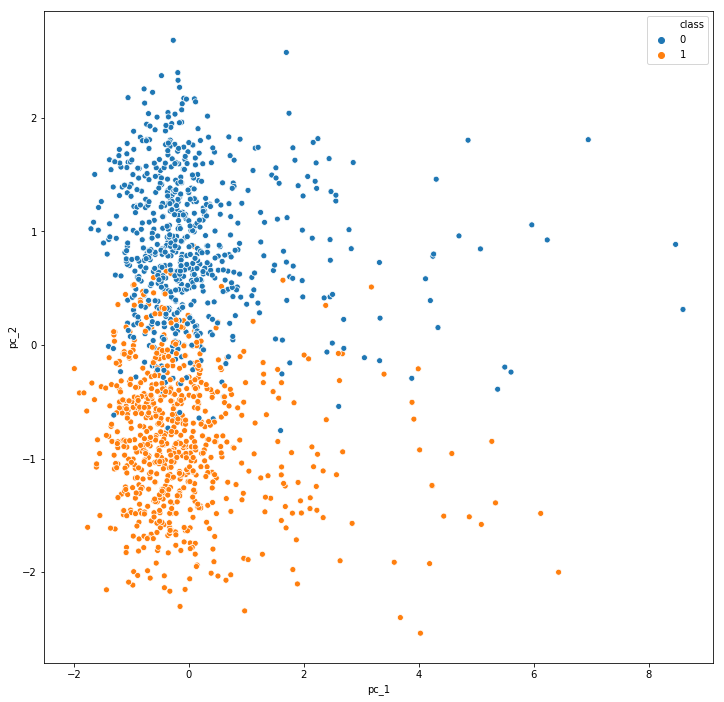

In [17]:
plt.figure(figsize=(12,12))

sns.scatterplot(data["pc_1"], data["pc_2"], hue=data["class"])

In [82]:
x_data = np.column_stack((x_pca[:,0], x_pca[:,2]))

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_data, races["class"], test_size=0.50, random_state=42)

In [111]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [112]:
clf = MLPClassifier()

In [113]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [114]:
y_pred = clf.predict(X_test)

In [115]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94       320
          1       0.95      0.93      0.94       376

avg / total       0.94      0.94      0.94       696

